In [19]:
import numpy as np
alpha = 0.113381622646105
a2 = -0.0178457555910623
a1 = 0.101773133860118
Ts = np.linspace(0,10,1000)
Rs = (1.+a1/alpha*Ts + a2*Ts**2)**alpha

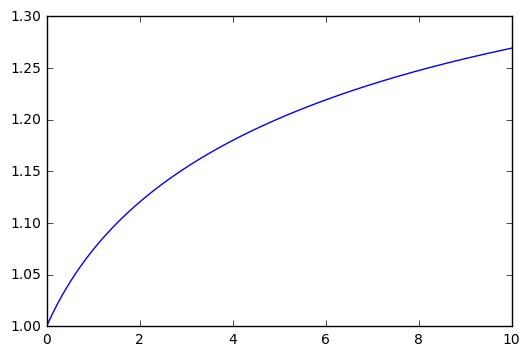

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Ts, Rs)

In [21]:
def model(T, a1, a2):
    alpha = 1/9.
    return (1.+a1/alpha*T + a2*T*T)**alpha

from lmfit import Model
gmod = Model(model)
result = gmod.fit(Rs, T=Ts, a1=a1, a2=a2)

In [22]:
print(result.fit_report())

[[Model]]
    Model(model)
[[Fit Statistics]]
    # function evals   = 12
    # data points      = 1000
    # variables        = 2
    chi-square         = 0.000
    reduced chi-square = 0.000
    Akaike info crit   = -17640.332
    Bayesian info crit = -17630.517
[[Variables]]
    a1:   0.10283022 +/- 1.18e-05 (0.01%) (init= 0.1017731)
    a2:  -0.01686915 +/- 1.54e-05 (0.09%) (init=-0.01784576)
[[Correlations]] (unreported correlations are <  0.100)
    C(a1, a2)                    = -0.935 



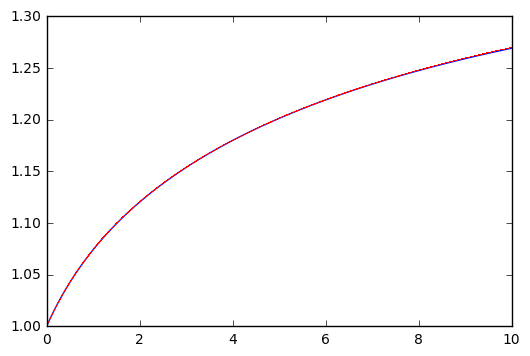

In [23]:
plt.plot(Ts, Rs, 'b')
#plt.plot(Ts, result.init_fit, 'k--')
plt.plot(Ts, result.best_fit, 'r,')
plt.show()

In [24]:
result.best_values['a1']

0.10283022841433383

In [25]:
result.best_values['a2']

-0.016869154631638014

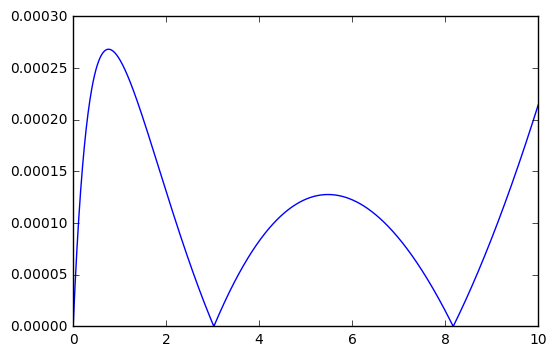

In [26]:
plt.plot(Ts, np.abs((result.best_fit - Rs)/Rs))